In [33]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm

sns.set_theme()

# Small model
(slice 3)

In [34]:
perm_small = np.load("spe10_l3_120_perm.npy")
phi_small = np.load("spe10_l3_120_phi.npy")
print(perm_small.shape)
print(phi_small.shape)

(120, 60)
(120, 60)


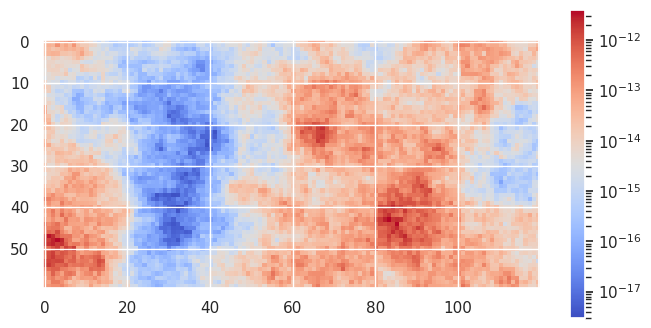

In [35]:
plt.figure(figsize=(8, 4))
cm = sns.color_palette("coolwarm", as_cmap=True)
plt.imshow(perm_small.T, cmap=cm, norm=LogNorm())
plt.colorbar()

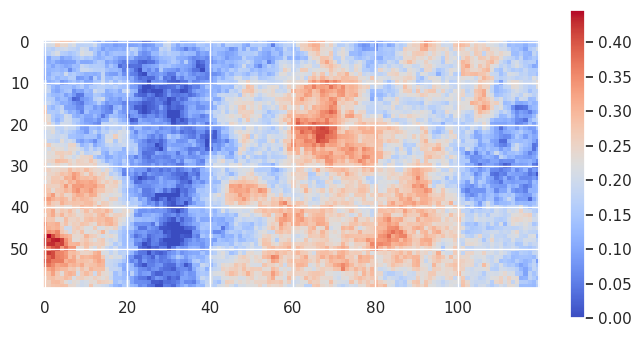

In [36]:
plt.figure(figsize=(8, 4))
cm = sns.color_palette("coolwarm", as_cmap=True)
plt.imshow(phi_small.T, cmap=cm)
plt.colorbar()

# Medium model
(slice 3)

In [37]:
perm_med = np.load("spe10_l3_220_perm.npy")
phi_med = np.load("spe10_l3_220_phi.npy")
print(perm_med.shape)
print(phi_med.shape)

(220, 60)
(220, 60)


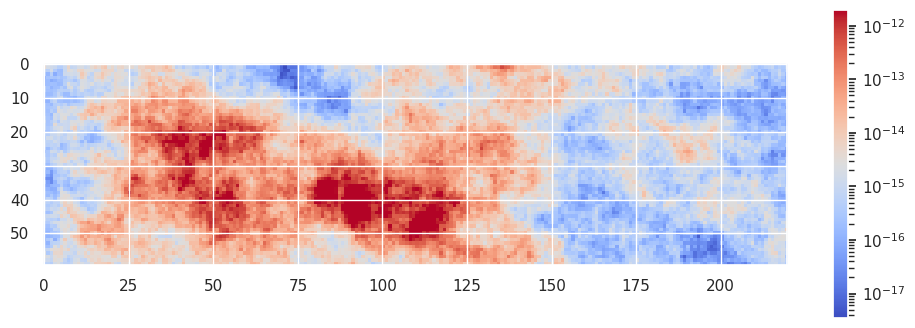

In [28]:
plt.figure(figsize=(12, 4))
cm = sns.color_palette("coolwarm", as_cmap=True)
plt.imshow(perm_med.T, cmap=cm, norm=LogNorm())
plt.colorbar()

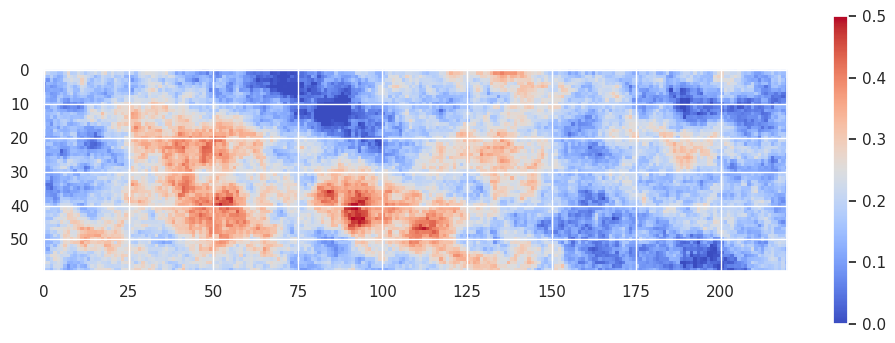

In [29]:
plt.figure(figsize=(12, 4))
cm = sns.color_palette("coolwarm", as_cmap=True)
plt.imshow(phi_med.T, cmap=cm)
plt.colorbar()

# Large model
(slices 3,4,5)

In [38]:
perm_large = np.load("spe10_l3-6_perm.npy")
phi_large = np.load("spe10_l3-6_phi.npy")
print(perm_large.shape)
print(phi_large.shape)

(3, 220, 60)
(3, 220, 60)


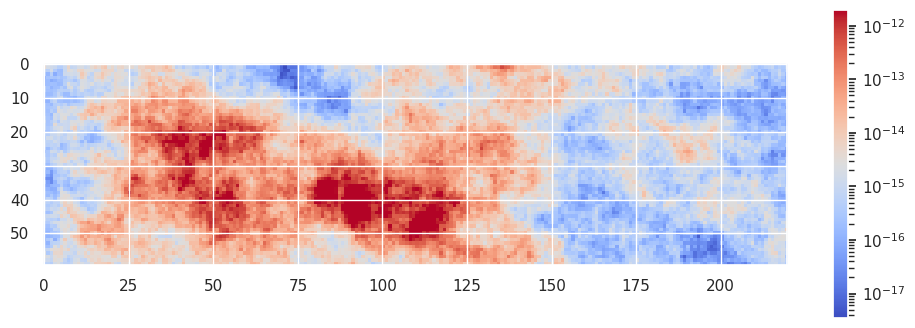

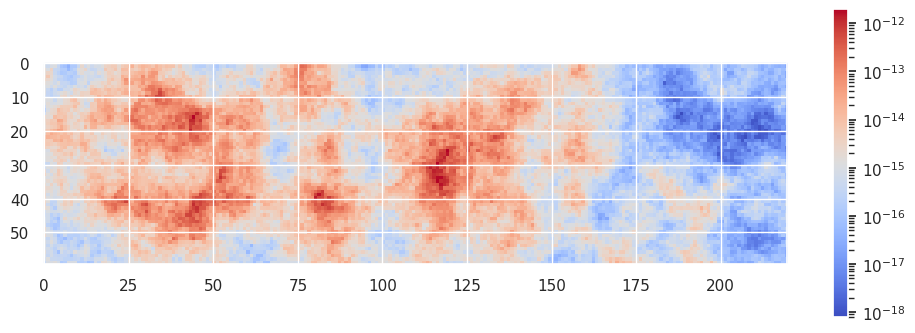

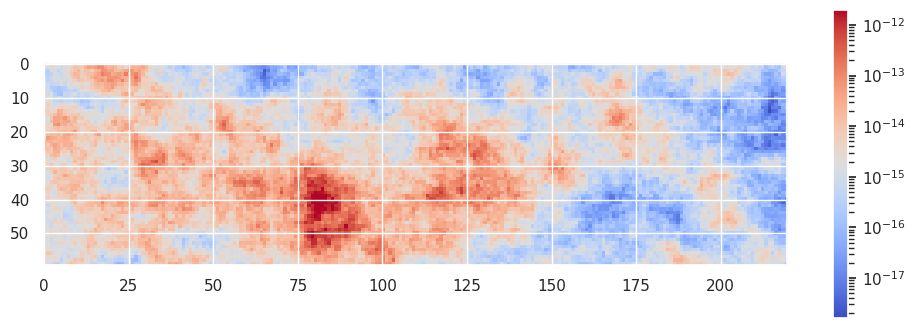

In [42]:
for data in perm_large:
    plt.figure(figsize=(12, 4))
    cm = sns.color_palette("coolwarm", as_cmap=True)
    plt.imshow(data.T, cmap=cm, norm=LogNorm())
    plt.colorbar()
    plt.show()

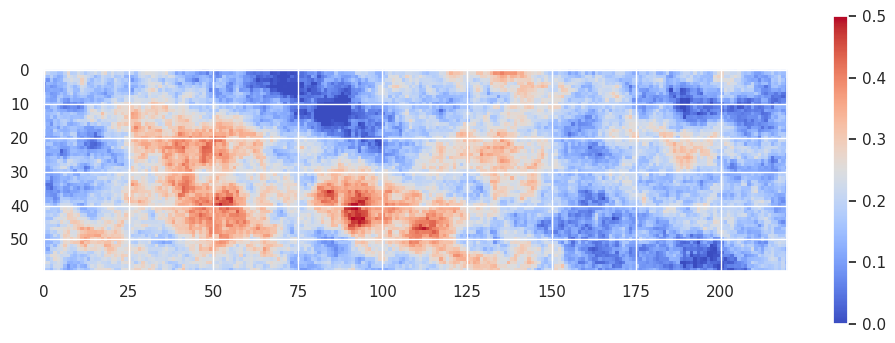

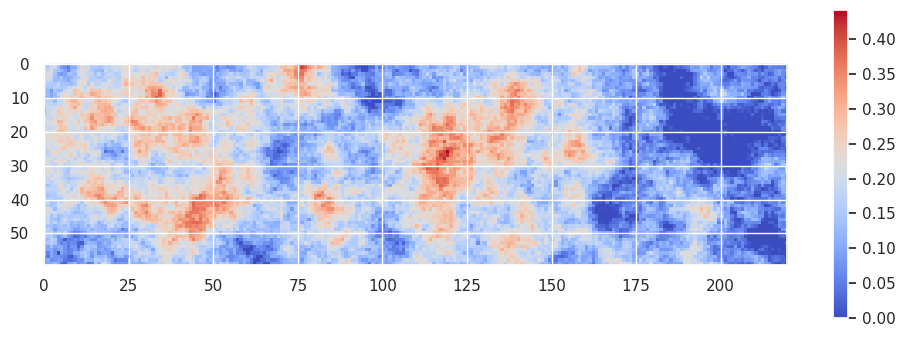

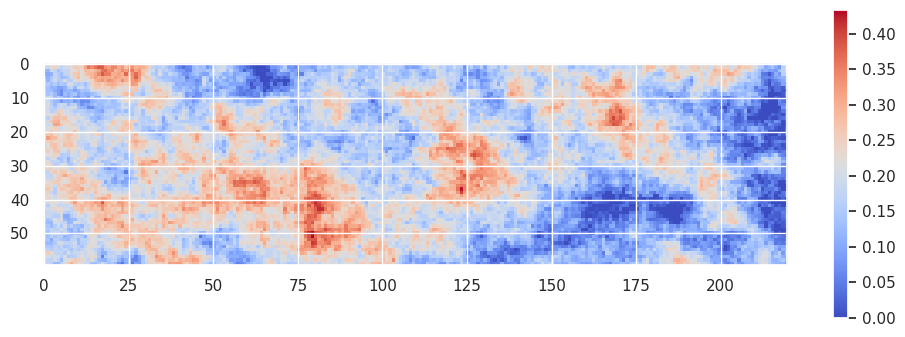

In [43]:
for data in phi_large:
    plt.figure(figsize=(12, 4))
    cm = sns.color_palette("coolwarm", as_cmap=True)
    plt.imshow(data.T, cmap=cm)
    plt.colorbar()
    plt.show()